## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.315037  1119.151249  0.162224  9.886865  1.220864
1  89.797691  1445.696087  0.036374  3.673557  0.413703
2  51.222230  1658.724771  0.008349  3.789440  0.231294
3  54.247300  1529.511705  0.050113  4.195374  0.924514
4  43.593196   214.671927  0.281112  3.645287  0.846568


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9902557	total: 69.7ms	remaining: 1m 9s
1:	learn: 0.9793078	total: 70.3ms	remaining: 35.1s
2:	learn: 0.9693545	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9575416	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9467812	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9359679	total: 72.4ms	remaining: 12s
6:	learn: 0.9265604	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9180203	total: 73.4ms	remaining: 9.1s
8:	learn: 0.9086783	total: 73.9ms	remaining: 8.13s
9:	learn: 0.9003548	total: 74.3ms	remaining: 7.36s
10:	learn: 0.8913867	total: 74.7ms	remaining: 6.72s
11:	learn: 0.8822910	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8740654	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8663352	total: 76ms	remaining: 5.35s
14:	learn: 0.8600088	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8509584	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8433840	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8364974	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8281392	total: 78.1ms	remaining: 4.0

89:	learn: 0.4605952	total: 109ms	remaining: 1.1s
90:	learn: 0.4575251	total: 110ms	remaining: 1.1s
91:	learn: 0.4543521	total: 110ms	remaining: 1.09s
92:	learn: 0.4509018	total: 111ms	remaining: 1.08s
93:	learn: 0.4475661	total: 111ms	remaining: 1.07s
94:	learn: 0.4448437	total: 111ms	remaining: 1.06s
95:	learn: 0.4417199	total: 112ms	remaining: 1.05s
96:	learn: 0.4385508	total: 112ms	remaining: 1.04s
97:	learn: 0.4355452	total: 113ms	remaining: 1.04s
98:	learn: 0.4326754	total: 113ms	remaining: 1.03s
99:	learn: 0.4305458	total: 113ms	remaining: 1.02s
100:	learn: 0.4281890	total: 114ms	remaining: 1.01s
101:	learn: 0.4256173	total: 114ms	remaining: 1s
102:	learn: 0.4224661	total: 115ms	remaining: 998ms
103:	learn: 0.4195738	total: 115ms	remaining: 991ms
104:	learn: 0.4166306	total: 115ms	remaining: 984ms
105:	learn: 0.4135368	total: 116ms	remaining: 977ms
106:	learn: 0.4102013	total: 116ms	remaining: 970ms
107:	learn: 0.4074934	total: 117ms	remaining: 963ms
108:	learn: 0.4047593	total:

269:	learn: 0.1902600	total: 188ms	remaining: 507ms
270:	learn: 0.1897866	total: 188ms	remaining: 506ms
271:	learn: 0.1888823	total: 188ms	remaining: 504ms
272:	learn: 0.1882634	total: 189ms	remaining: 503ms
273:	learn: 0.1875776	total: 189ms	remaining: 501ms
274:	learn: 0.1866847	total: 190ms	remaining: 500ms
275:	learn: 0.1858258	total: 190ms	remaining: 499ms
276:	learn: 0.1849768	total: 190ms	remaining: 497ms
277:	learn: 0.1840513	total: 191ms	remaining: 496ms
278:	learn: 0.1833488	total: 191ms	remaining: 494ms
279:	learn: 0.1823581	total: 192ms	remaining: 493ms
280:	learn: 0.1815968	total: 192ms	remaining: 491ms
281:	learn: 0.1809593	total: 192ms	remaining: 490ms
282:	learn: 0.1801878	total: 193ms	remaining: 489ms
283:	learn: 0.1793989	total: 193ms	remaining: 488ms
284:	learn: 0.1784862	total: 194ms	remaining: 486ms
285:	learn: 0.1779428	total: 194ms	remaining: 485ms
286:	learn: 0.1774087	total: 195ms	remaining: 484ms
287:	learn: 0.1768309	total: 195ms	remaining: 483ms
288:	learn: 

519:	learn: 0.0943651	total: 292ms	remaining: 269ms
520:	learn: 0.0941936	total: 292ms	remaining: 269ms
521:	learn: 0.0939254	total: 293ms	remaining: 268ms
522:	learn: 0.0937572	total: 293ms	remaining: 267ms
523:	learn: 0.0936105	total: 294ms	remaining: 267ms
524:	learn: 0.0933496	total: 294ms	remaining: 266ms
525:	learn: 0.0931845	total: 294ms	remaining: 265ms
526:	learn: 0.0930410	total: 295ms	remaining: 265ms
527:	learn: 0.0927872	total: 295ms	remaining: 264ms
528:	learn: 0.0925052	total: 296ms	remaining: 263ms
529:	learn: 0.0921845	total: 296ms	remaining: 263ms
530:	learn: 0.0919957	total: 297ms	remaining: 262ms
531:	learn: 0.0917203	total: 297ms	remaining: 261ms
532:	learn: 0.0915808	total: 298ms	remaining: 261ms
533:	learn: 0.0913398	total: 298ms	remaining: 260ms
534:	learn: 0.0909560	total: 299ms	remaining: 259ms
535:	learn: 0.0907718	total: 299ms	remaining: 259ms
536:	learn: 0.0905047	total: 299ms	remaining: 258ms
537:	learn: 0.0903934	total: 300ms	remaining: 257ms
538:	learn: 

696:	learn: 0.0586213	total: 369ms	remaining: 160ms
697:	learn: 0.0584483	total: 370ms	remaining: 160ms
698:	learn: 0.0582365	total: 370ms	remaining: 159ms
699:	learn: 0.0580938	total: 371ms	remaining: 159ms
700:	learn: 0.0578360	total: 371ms	remaining: 158ms
701:	learn: 0.0576120	total: 372ms	remaining: 158ms
702:	learn: 0.0574115	total: 372ms	remaining: 157ms
703:	learn: 0.0571859	total: 373ms	remaining: 157ms
704:	learn: 0.0570477	total: 373ms	remaining: 156ms
705:	learn: 0.0568383	total: 373ms	remaining: 156ms
706:	learn: 0.0566955	total: 374ms	remaining: 155ms
707:	learn: 0.0564650	total: 374ms	remaining: 154ms
708:	learn: 0.0563236	total: 375ms	remaining: 154ms
709:	learn: 0.0562716	total: 375ms	remaining: 153ms
710:	learn: 0.0562203	total: 375ms	remaining: 153ms
711:	learn: 0.0561758	total: 376ms	remaining: 152ms
712:	learn: 0.0559892	total: 376ms	remaining: 151ms
713:	learn: 0.0557639	total: 377ms	remaining: 151ms
714:	learn: 0.0556262	total: 377ms	remaining: 150ms
715:	learn: 

930:	learn: 0.0324940	total: 474ms	remaining: 35.1ms
931:	learn: 0.0324115	total: 474ms	remaining: 34.6ms
932:	learn: 0.0322973	total: 475ms	remaining: 34.1ms
933:	learn: 0.0322724	total: 475ms	remaining: 33.6ms
934:	learn: 0.0322442	total: 476ms	remaining: 33.1ms
935:	learn: 0.0321180	total: 476ms	remaining: 32.6ms
936:	learn: 0.0320373	total: 477ms	remaining: 32ms
937:	learn: 0.0320098	total: 477ms	remaining: 31.5ms
938:	learn: 0.0319210	total: 478ms	remaining: 31ms
939:	learn: 0.0318965	total: 478ms	remaining: 30.5ms
940:	learn: 0.0317878	total: 479ms	remaining: 30ms
941:	learn: 0.0317636	total: 479ms	remaining: 29.5ms
942:	learn: 0.0316727	total: 479ms	remaining: 29ms
943:	learn: 0.0315936	total: 480ms	remaining: 28.5ms
944:	learn: 0.0315158	total: 480ms	remaining: 28ms
945:	learn: 0.0314068	total: 481ms	remaining: 27.4ms
946:	learn: 0.0313172	total: 481ms	remaining: 26.9ms
947:	learn: 0.0312400	total: 482ms	remaining: 26.4ms
948:	learn: 0.0312161	total: 482ms	remaining: 25.9ms
949

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

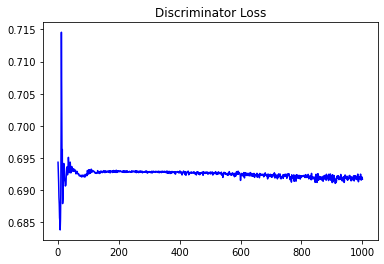

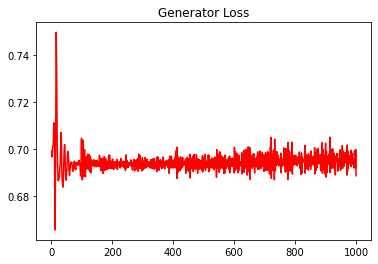

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16753024070980727


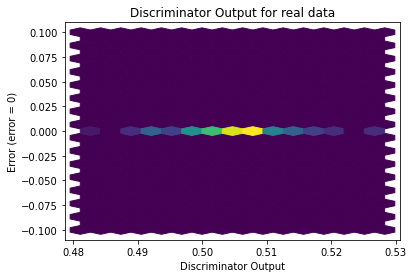

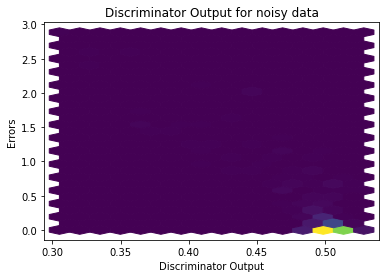

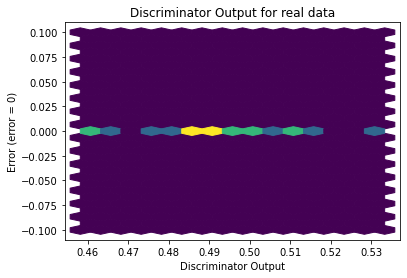

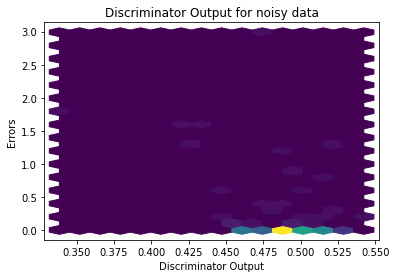

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


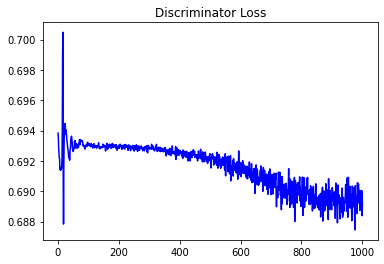

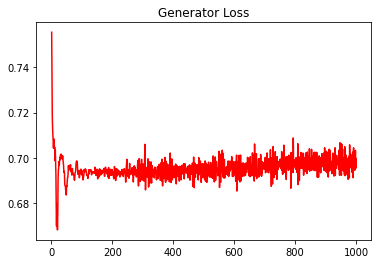

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16450517766650155


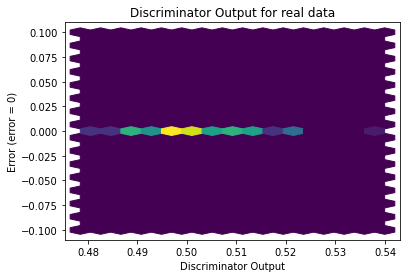

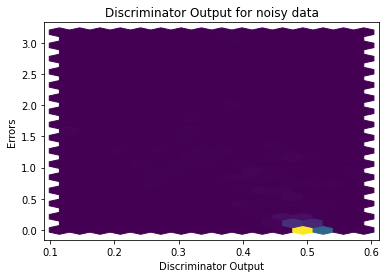

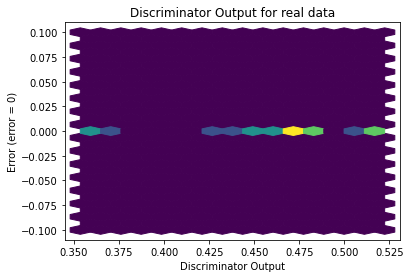

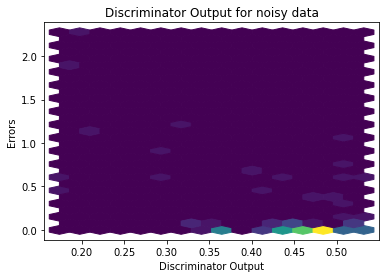

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1219]], requires_grad=True)
